<a href="https://colab.research.google.com/github/varshum12/DL-27-Nov-2025/blob/main/LInear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path  =  '/content/Cars (1).csv'

###  file  reading

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as  pd
import numpy as  np
import seaborn as  sns
import matplotlib.pyplot as plt


In [4]:
df  =  pd.read_csv(path  ,  keep_default_na=False  ,
                   na_values= ['' ,  "NA"])

### Baisc data quality checks

In [5]:
df.head()

,id1,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,...,5,162,94,65,36,24.0,11.0,2055,non-USA,Toyota Tercel
1,2,Lexus,ES300,Midsize,27.5,28.0,28.4,18,24,Driver only,...,5,188,103,70,40,27.5,14.0,3510,non-USA,Lexus ES300
2,3,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30,Driver only,...,5,179,102,67,37,27.0,14.0,3085,non-USA,Subaru Legacy
3,4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV
4,5,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8556 entries, 0 to 8555
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id1                 8556 non-null   int64  
 1   Manufacturer        8556 non-null   object 
 2   Model               8556 non-null   object 
 3   Type                8556 non-null   object 
 4   Min.Price           8556 non-null   float64
 5   Price               8556 non-null   float64
 6   Max.Price           8556 non-null   float64
 7   MPG.city            8556 non-null   int64  
 8   MPG.highway         8556 non-null   int64  
 9   AirBags             8185 non-null   object 
 10  DriveTrain          8556 non-null   object 
 11  Cylinders           8556 non-null   object 
 12  EngineSize          8556 non-null   float64
 13  Horsepower          8556 non-null   int64  
 14  RPM                 8556 non-null   int64  
 15  Rev.per.mile        8556 non-null   int64  
 16  Man.tr

In [10]:
n  =  df.isnull().sum()
n[n>0]

,0
AirBags,371
Rear.seat.room,180
Luggage.room,1025


In [11]:
df.duplicated().sum()

np.int64(0)

## seperate x and  y

In [12]:
df.columns

Index(['id1', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

In [13]:
x  =  df.drop(['id1' , 'Weight'] , axis =  1  )
y  =  df['Weight']

In [14]:
x.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,Toyota,Tercel,Small,7.8,9.8,11.8,32,37,Driver only,Front,...,11.9,5,162,94,65,36,24.0,11.0,non-USA,Toyota Tercel
1,Lexus,ES300,Midsize,27.5,28.0,28.4,18,24,Driver only,Front,...,18.5,5,188,103,70,40,27.5,14.0,non-USA,Lexus ES300
2,Subaru,Legacy,Compact,16.3,19.5,22.7,23,30,Driver only,4WD,...,15.9,5,179,102,67,37,27.0,14.0,non-USA,Subaru Legacy
3,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,20.0,7,178,110,74,44,30.5,NaN,USA,Chevrolet Lumina_APV
4,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,15.2,5,182,101,66,38,25.0,13.0,USA,Chevrolet Cavalier


In [15]:
y.head()

,Weight
0,2055
1,3510
2,3085
3,3715
4,2490


### Seperate  cat and  num  

In [16]:
cat  =  x.columns[x.dtypes =='object']
num  =  x.columns[x.dtypes !='object']

In [17]:
print(cat)
print()
print(num)

Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object')

Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')


In [19]:
x['Model'].unique()

array(['Tercel', 'ES300', 'Legacy', 'Lumina_APV', 'Cavalier', 'Eurovan',
       'Festiva', 'Vision', 'Diamante', 'Justy', 'Grand_Prix', '100',
       'LeSabre', 'Century', '900', 'Eighty-Eight', 'Lumina', 'Metro',
       'Stealth', 'SL', 'Altima', 'Roadmaster', 'Cutlass_Ciera', '240',
       'Maxima', 'Caprice', 'Sentra', 'Previa', 'Legend', 'Spirit',
       'Taurus', 'Shadow', '90', 'Cougar', 'Fox', 'Firebird', 'Quest',
       'Camry', 'Sonata', 'Tempo', 'Dynasty', 'Bonneville', 'Corvette',
       'LeMans', 'Civic', 'SC300', 'Caravan', 'Continental', 'Protege',
       'Capri', 'Probe', '323', 'Town_Car', '850', 'Concorde', 'Escort',
       'Silhouette', 'Riviera', 'Accord', 'LeBaron', 'Achieva', '190E',
       'Swift', 'Corsica', 'Seville', 'Passat', 'Colt', 'Elantra',
       'Celica', 'Crown_Victoria', 'RX-7', 'Astro', 'Aerostar', 'Loyale',
       'Storm', '626', 'Q45', 'Excel', 'Summit', 'Integra', 'Mirage',
       'Sunbird', 'Mustang', 'DeVille', 'Scoupe', '535i', 'MPV', 'Camaro',


### create pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute  import SimpleImputer

In [22]:
num_pipeline =  Pipeline(steps  = [('imputer' , SimpleImputer(strategy='mean')) ,
                                   ('scaler' , StandardScaler())] )

cat_pipeline  =  Pipeline(steps =  [('imputer' , SimpleImputer(strategy  =  'most_frequent')) ,
                                    ('encoder' ,  OrdinalEncoder())])

In [23]:
pre =  ColumnTransformer([('num' ,  num_pipeline ,  num)  ,
                          ('cat' , cat_pipeline ,  cat)])

In [24]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Min.Price', 'Price', 'Max.Price', 'MPG.city', 'MPG.highway',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Fuel.tank.capacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle',
       'Rear.seat.room', 'Luggage.room'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['Manufacturer', 'Model', 'Type', 'AirBags', 'DriveTrain', 'Cylinders',
       'Man.trans.avail', 'Origin', 'Make'],
      dtype='object'))])

In [25]:
## aply  to data
x_scaled  =  pre.fit_transform(x)

In [26]:
x_scaled

array([[-1.06513120e+00, -1.00862838e+00, -9.23020335e-01, ...,
         1.00000000e+00,  1.00000000e+00,  8.60000000e+01],
       [ 1.18186902e+00,  8.76793468e-01,  5.87973111e-01, ...,
         1.00000000e+00,  1.00000000e+00,  4.80000000e+01],
       [-9.56133433e-02, -3.76069249e-03,  6.91380121e-02, ...,
         1.00000000e+00,  1.00000000e+00,  8.00000000e+01],
       ...,
       [ 1.04499591e+00,  7.00682636e-01,  3.96823338e-01, ...,
         0.00000000e+00,  0.00000000e+00,  7.00000000e+00],
       [-1.01950683e+00, -1.09150407e+00, -1.09596537e+00, ...,
         1.00000000e+00,  0.00000000e+00,  7.50000000e+01],
       [-7.11542338e-01, -8.22158089e-01, -8.77508484e-01, ...,
         1.00000000e+00,  1.00000000e+00,  5.50000000e+01]])

In [27]:
x_scaled  =  pd.DataFrame(x_scaled , columns =  x.columns )

In [28]:
x_scaled.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Origin,Make
0,-1.065131,-1.008628,-0.923020,1.680241,1.461275,-1.126873,-1.180752,-0.127721,2.370666,-1.443413,...,-1.041774,29.0,90.0,3.0,1.0,1.0,1.0,1.0,1.0,86.0
1,1.181869,0.876793,0.587973,-0.776170,-0.949254,0.330813,0.818523,-0.127721,-0.024507,0.558949,...,0.043071,15.0,37.0,2.0,1.0,1.0,3.0,1.0,1.0,48.0
2,-0.095613,-0.003761,0.069138,0.101120,0.163298,-0.446619,-0.249051,0.548139,-0.014358,-0.229860,...,0.043071,27.0,54.0,0.0,1.0,0.0,1.0,1.0,1.0,80.0
3,-0.278111,-0.335263,-0.358673,-0.776170,-1.134679,1.108245,0.527367,-0.803580,-1.313435,1.014032,...,0.000000,5.0,58.0,5.0,2.0,1.0,3.0,0.0,0.0,18.0
4,-0.985289,-0.635688,-0.331366,0.452036,1.275850,-0.446619,-0.637259,-0.127721,0.087133,-0.442232,...,-0.318544,5.0,21.0,0.0,2.0,1.0,1.0,1.0,0.0,14.0


#### train test  split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train  ,  x_test  , y_train ,  y_test =  train_test_split(x_scaled  ,  y  ,
                                                            test_size =  0.2  ,
                                                            random_state  = 45)

In [31]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape  , y_test.shape)

(6844, 26) (6844,)
(1712, 26) (1712,)


### create architechture

In [32]:
import keras
from  keras.models import Sequential
from keras.layers  import Dense

In [38]:
nn  =  Sequential()

## add  input layer
nn.add(Dense(units  =  300 ,  input_dim  =  x_train.shape[1]))

##  add  hidden  layers
nn.add(Dense(units  =  256  ,  activation= 'relu'    ))
nn.add(Dense(units  =  512  ,  activation= 'relu'    ))

##  add output layer
nn.add(Dense(units  =  1 , activation  =  'linear'))


In [39]:
nn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 300)            │         8,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        77,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,253 (848.64 KB)

 Trainable params: 217,253 (848.64 KB)

 Non-trainable params: 0 (0.00 B)

### model compilation

In [40]:
nn.compile(optimizer  =  'adam' ,  loss  =  'mse' ,  metrics= ['mae'])

In [41]:
###  model fitting

In [42]:
hist =  nn.fit(x_train,  y_train  ,  epochs  = 50  ,  validation_split=0.2   )

Epoch 1/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 3839727.0000 - mae: 1610.1825 - val_loss: 631081.2500 - val_mae: 598.0115
Epoch 2/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 394369.6562 - mae: 473.7345 - val_loss: 182223.0938 - val_mae: 334.4836
Epoch 3/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 154625.3906 - mae: 312.9117 - val_loss: 120789.9609 - val_mae: 273.5361
Epoch 4/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 111979.6016 - mae: 265.1483 - val_loss: 94284.4609 - val_mae: 241.6316
Epoch 5/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 90748.7188 - mae: 238.8457 - val_loss: 81953.1797 - val_mae: 230.8559
Epoch 6/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79286.6562 - mae: 225.3389 - val_loss: 72788.4844 - val_mae: 213.5397
Epoch 7/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72045.6641 - mae: 215.0314 - val_loss: 68340.0156 - val_mae: 207.5955
Epoch 8/50
172/172 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 59292.4453 - mae: 194

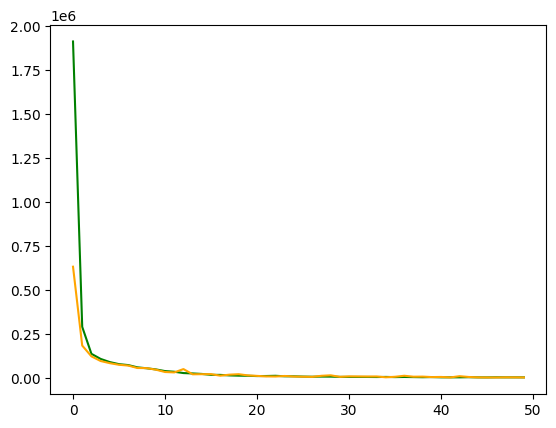

In [43]:
### plot graph  beteen loss  and  val_loss
plt.plot(hist.history['loss'] ,  c  = 'green' )
plt.plot(hist.history['val_loss'] ,  c  =  'orange')

### model  evaluation

In [45]:
from  sklearn.metrics  import (r2_score ,  mean_absolute_error , mean_squared_error ,
                               root_mean_squared_error)

In [46]:
def evaluate(model  , x ,  y):
  pred  =  model.predict(x)
  MSE  = mean_squared_error(y  ,  pred)
  MAE  = mean_absolute_error(y , pred)
  RMSE  =  root_mean_squared_error(y ,  pred)
  r2  =  r2_score(y  , pred)

  print('MSE  --- >  ' ,  MSE)
  print('RMSE  --- >  ' ,  RMSE)
  print('MAE  --- >  ' ,  MAE)
  print('r2  --- >  ' ,  r2)

### training evaluation


In [47]:
evaluate(nn  ,  x_train  ,  y_train)

214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
MSE  --- >   693.0240478515625
RMSE  --- >   26.325349807739258
MAE  --- >   20.14637565612793
r2  --- >   0.9979807734489441


### testing evaluation

In [48]:
evaluate(nn  ,  x_test  , y_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
MSE  --- >   709.6448364257812
RMSE  --- >   26.63916015625
MAE  --- >   20.20855140686035
r2  --- >   0.9980587959289551


In [ ]:
### model  is  working good on training and  testing .we can  use this  model  for future  prediction